In [10]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from matplotlib.colors import LogNorm, Normalize
import numpy as np; np.random.seed(0)
import seaborn as sns; sns.set_theme()
import matplotlib.pyplot as plt
from io import StringIO


import pickle as pkl
import gzip
import os
from io import StringIO


import numpy as np; np.random.seed(0)
import seaborn as sns; sns.set_theme()

import matplotlib.patches as mpatches
import matplotlib.ticker as tkr

formatter = tkr.ScalarFormatter(useMathText=True)
formatter.set_scientific(True)
formatter.set_powerlimits((-2, 2))

np.set_printoptions(suppress=True)

def nans(carte):
    for i in [0,1]:
        for j in [2,3,4,5,6,7]:
            carte[i,j] = np.nan
    return carte

def print_graphics(stochasticity):

    maximum = []
    minimum = []
    
    paths = []
    for i in [1,0.04,0.01]:
    
        fig, axn = plt.subplots( nrows=1, ncols=1, figsize=(7,5), sharex = True, sharey = True )
        
        map = pkl.load(  open('./cvar/gridworld/results/map_{}_{}.pkl'.format(i, stochasticity), 'rb') )
        path = np.array( pkl.load(  open('./cvar/gridworld/results/path_{}_{}.pkl'.format(i, stochasticity), 'rb') ) )
        paths.append(path)
        maximum.append( np.max(map) )
        minimum.append( np.min(map) )
        
        annotations = pd.DataFrame( np.round( map, 2)  )
        annotations = annotations.replace(0,".")
        annotations = annotations.astype(str)  
        annotations.loc[0,9] = 'G'
        annotations.loc[0,0] = 'S'
    
        a = sns.heatmap( nans( map) , linewidths=.5,  cmap=sns.light_palette("seagreen", as_cmap=True),  fmt="s",annot_kws={"fontsize":10}, vmin = min(minimum), vmax = max(maximum) ) #annot=annotations,
        a.set_facecolor('xkcd:salmon') 
        a.plot( path[0] + 0.5, path[1] + 0.5, 'o-', color='navy', label=r'Optimal Policy $\alpha = {}$'.format(i))
        
        a.legend()
        fig.savefig('./CVAR_optimal_{}_{}.png'.format(i, stochasticity), bbox_inches='tight')

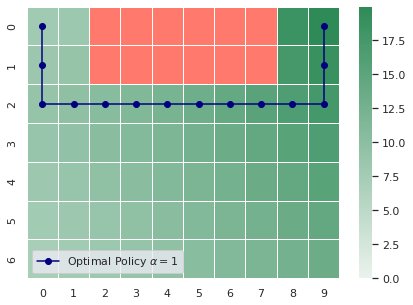

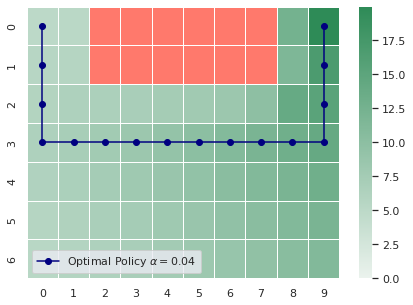

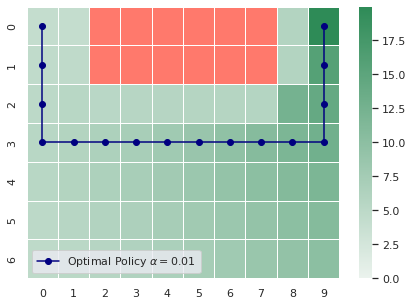

In [11]:
print_graphics(0.05)  

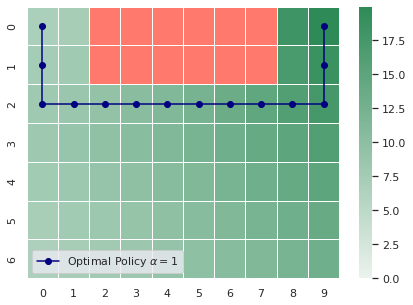

In [ ]:
print_graphics(0.1) 